Welcome to my project **Psychosis in MRI**.<br /> 
My name is Julie Folkerts.<br /> 
Date of completion: 18-12-2025.<br /> 
https://neurosynth.org/locations/0_0_0_6/

The first step is to locate our MRI data automatically. I do this by making a relative file path from the current working directory. I created a folder named datagiles which stores the MRI data.

In [ ]:
#Step 1: Write code that locates your MRI data automatically:
file_1 = open ('datafiles/anatomical.nii','r').close()
file_2 = open ('datafiles/functional_connectivity_0_0_0.nii','r').close()


The second step is to visualize the functional data ontop of the anatomical scan using nilearn’s plot_stat_map function. First I imported plotting and image from nilearn. First I got the error that my input in the plot_stat_map function had the wrong inputtype. So I looked in the documentation and followed the link that gave information about this: "See Input and output: neuroimaging data representation." This documentation told me to use the image.smooth_img function. 

Then I got an error "TypeError: smooth_img() missing 1 required positional argument: 'fwhm' " which I looked up. It was a missing parameter "fwhm" which indicates the amount of smoothing applied to the MRI image. I played with different values and the image did not get smoother with the lowest value of 0.1. Therefore I choose that value. Finally, I used black formatting to make my code organized according to PEP 8 coding conventions. 

I changed the color map to viridis so the images are readable for color blindness. 

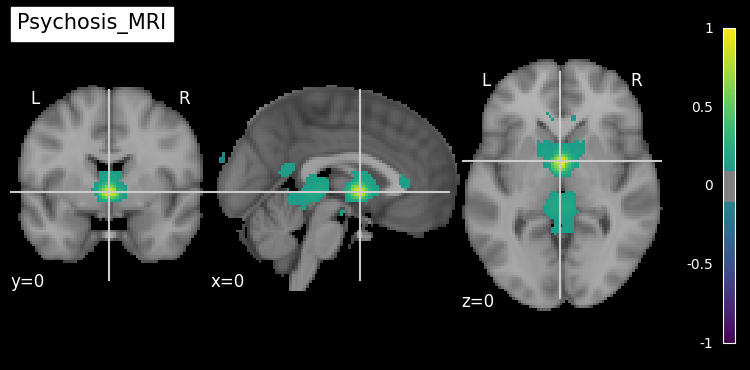

In [30]:
from nilearn import image, plotting 

smoothed_img_1 = image.smooth_img("datafiles/anatomical.nii", fwhm=0.1)
smoothed_img_2 = image.smooth_img(
    "datafiles/functional_connectivity_0_0_0.nii", fwhm=0.1
)
psychosis_plot = plotting.plot_stat_map(
    stat_map_img=smoothed_img_2,
    bg_img=smoothed_img_1,
    cut_coords=[0, 0, 0],
    title="Psychosis_MRI",
    threshold=0.1,
    cmap="viridis",
)

To start, I imported nibabel, numpy and matpotlib.pyplot. Looking at the documentation of Nibabel, I first found how to load the information from the functional data file with the function "nib.load". Then I printed this to see what the output would be like. I was looking for negative and positive data, because the assignment said we needed the positive data only. I looked this up in the documentation and first found the following: "For the array image, get_fdata() just returns the data array, if it’s already the required floating point type (default 64-bit float)." I found that this get_fdata() conveys a NIfTI MRI image into an array usable in Python. I printed this and got a big array of the data. 

Then I wanted to have the positive values only from this array. I looked this up in the numpy documentation and found that I could do this with array_positive = array [array>0]. I tried this and made a variable called **positive_values**, printed **positive_values** to see if it worked. It did!

Then I created a histogram using practical 4.2 and the matplotlib documentation. First I defined the bins. I was unsure which value the bins needed, so I googled appropriate bin size for MRI scans and saw some people using 100. Then I create the histogram with the variable positive_values as x, bins = 100 and histtype = "bar" and rwidth=1. I did this in practical 4.2 as well. I set a label for the x-axis called **Voxel Intensity**, which demonstrates the strength of the signal of each voxel in our functional data (most value of 0 (no activation) and the area's in the brain associated with psychosis have higher intensity values). I set a label for the y-axis called **Number of Voxels** which demonstrates the amount of voxels of the functional data that fall into which intensity range. As expected, most voxels have a value close to 0 (no intensity because no brain activity) and a smaller amount of voxels have a higher intensitiy value, which are the voxels of the brain regions associated with psychosis. I set a label for the title as well: **Histogram of the Distribution of Functional MRI Voxel Intensities in Psychosis**. 

It worked. I got a histogram with a skewed distribution, with the x values from 0 to 0.2 but my x-axis was from 0 to 1 so it looked really squized together. I looked up in the matplotlib documentation how to set my x-values up until 0.2 and found this with *range*. I implemented this and the distribution was better. 




/var/folders/y3/wgbc8h9175x96d46dsc7tt_r0000gn/T/ipykernel_82003/1061311340.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(positive_values, bins, range, histtype="bar", rwidth=1)


Text(0.5, 1.0, 'Histogram of the Distribution of Functional MRI Voxel Intensities in Psychosis')

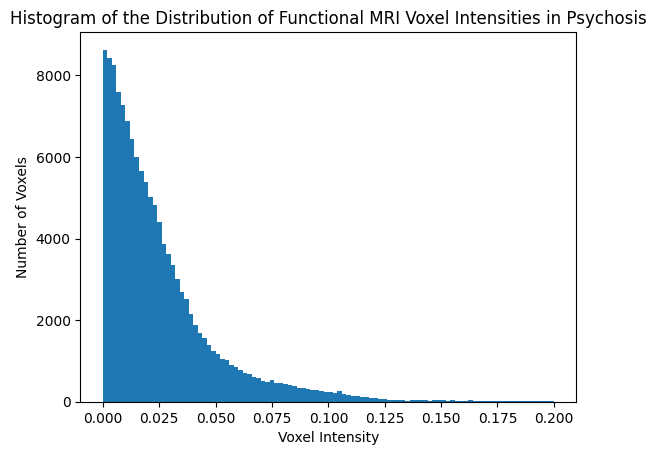

In [62]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
img_functional = nib.load('datafiles/functional_connectivity_0_0_0.nii')
# print (img_functional)
image_data = img_functional.get_fdata()
# print (image_data)
positive_values = image_data[image_data>0]
#print (positive_values)
bins = 100
range = (0,0.2)
plt.hist(positive_values, bins, range, histtype="bar", rwidth=1)
plt.xlabel("Voxel Intensity")
plt.ylabel("Number of Voxels")
plt.title("Histogram of the Distribution of Functional MRI Voxel Intensities in Psychosis")